# Predicting Diabetes Risk Using Health Parameters: A Machine Learning Approach

# Introduction
The Diabetes Dataset is a widely used dataset in the field of healthcare analytics and machine learning, primarily focused on predicting whether a person is diabetic or not based on certain medical diagnostic measurements. This dataset is sourced from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) and contains information about female patients of  Indian heritage who are 21 years of age or older.

# Objective
* The primary goal of the dataset is to:
* Predict whether a person has diabetes (Yes/No) based on diagnostic measurements.
* Identify key influencing factors like glucose concentration, BMI, age, insulin levels, etc., that contribute to the diagnosis of diabetes.
* Help healthcare professionals make data-driven decisions to prevent or manage diabetes.

# Goal:
Goal of This Project:
* Build a Predictive Model to classify whether a person is diabetic or not.
* Use Machine Learning Algorithms like K-Nearest Neighbors (KNN), Logistic Regression, Random Forest, etc., to evaluate performance.
* Achieve High Accuracy while minimizing False Negatives (i.e., predicting non-diabetic for a diabetic patient).
* Find the Key Influencing Factors that contribute most to diabetes prediction.

# Why KNN is suitable:
* Simple and easy to implement.
* Works well with smaller datasets (like ILPD).
* Captures similarity-based patterns.
* Good for medical data where “similar patients” can give insights.

# Importing the Libraries

In [511]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

# Data Loading

In [513]:
a=pd.read_csv('M4_Diabetes.csv')
a

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


# Data Understanding

In [515]:
a.head()

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [516]:
a.tail(2)

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
766,1,126,60,0,0,30.1,0.349,47,YES
767,1,93,70,31,0,30.4,0.315,23,NO


In [517]:
a.shape

(768, 9)

In [518]:
a.columns

Index([' No.of_times_pregnant', 'glucose_conc', 'blood_pressure',
       'skin_fold_thickness', '2-Hour_serum_insulin', 'BMI',
       'Diabetes_pedigree_fn', 'Age', 'Is_Diabetic'],
      dtype='object')

# Data Inspection

In [520]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    No.of_times_pregnant  768 non-null    int64  
 1   glucose_conc           768 non-null    int64  
 2   blood_pressure         768 non-null    int64  
 3   skin_fold_thickness    768 non-null    int64  
 4   2-Hour_serum_insulin   768 non-null    int64  
 5   BMI                    768 non-null    float64
 6   Diabetes_pedigree_fn   768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Is_Diabetic            768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# Key Insights from Dataset Information (Data Info):
# Total Records: 
The dataset contains 768 rows and 9 columns, meaning 768 individuals' data was collected.

# Data Types:
6 Integer Columns: Representing counts or whole numbers like pregnancies, glucose concentration, blood pressure, etc.
2 Float Columns: Representing decimal values like BMI and Diabetes Pedigree Function.
1 Object Column: The target variable Is_Diabetic which indicates whether the person is diabetic (Yes/No).

# No Missing Values:
All columns have 768 non-null values, indicating no missing data in the dataset. This ensures a clean dataset for analysis without requiring imputation.

# Target Variable:
The column Is_Diabetic is the output variable indicating whether the individual has diabetes or not.
Further analysis is needed to check for class imbalance in this column.

# Potential Outliers:
Columns like Glucose, Blood Pressure, Skin Fold Thickness, and Insulin may have extreme values that need to be checked using box plots.
Possible skewness in Age, BMI, and Insulin levels.
#  Feature Correlation:
Certain features like Glucose Concentration, BMI, and Insulin Levels could have a strong correlation with diabetes prediction.
Performing correlation analysis will help identify the most influential factors.

# Data Readiness:
The dataset appears clean with no null values, but further data preprocessing like normalization, handling outliers, and feature scaling might be required for better model accuracy.


In [522]:
a.describe()

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Data Quality Issues
* Zero Values: Columns like Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI have zero values, which are unrealistic and should be treated as missing data.
* Outliers: Insulin, Skin Thickness, and BMI have extreme maximum values, indicating potential outliers.

# Insights :
* Women with higher pregnancy counts may have higher chances of developing diabetes. This can be explored through correlation analysis.
* Higher pedigree function values may correlate with higher diabetes risk.
* Age is an important factor; older individuals are generally more prone to diabetes.
* BMI has a strong influence on diabetes prediction. 

#  Key Insights from Data Summary:
# No Missing Values: 
The dataset contains 768 records with no null values, ensuring complete data for analysis. However, some columns have zero values, which need to be treated.

# Potential Data Issues:

Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI have zero values, which are unrealistic and may require imputation.
High outliers in Insulin (max 846), BMI (max 67.1), and Pregnancies (max 17) may affect model performance.
# Age Distribution:

The average age is 33 years, with a maximum of 81 years, indicating a wide age range of participants.
Older individuals may have a higher risk of diabetes.
# Glucose Concentration:

The average glucose level is 120.89 mg/dL.
Extreme glucose levels (min 0, max 199) suggest potential errors or missing data.
# Pregnancy Count:

The average pregnancy count is 3.84, with a maximum of 17 pregnancies, which may influence diabetes risk.
# Insulin Levels:

Insulin has extreme values (max 846 μU/ml), indicating potential outliers or health conditions.
# BMI and Diabetes Risk:

The average BMI is 31.99 kg/m², which is categorized as obese.
Higher BMI may significantly contribute to diabetes risk.
# Genetic Risk:

The Diabetes Pedigree Function (DPF) ranges from 0.078 to 2.42, indicating some participants have a strong genetic predisposition to diabetes.
# Target Variable:

The target column (Is_Diabetic) will help classify individuals as diabetic or non-diabetic, requiring imbalance checking.

# Data Preprocessing 

In [527]:
a.duplicated().sum()

0

In [528]:
def duplicate_report(df):
    total_rows = df.shape[0]
    duplicate_rows = df.duplicated().sum()
    print(f"🔹 Total Rows: {total_rows}")
    print(f"🔹 Duplicate Rows: {duplicate_rows}")
    print(f"🔹 Unique Rows: {total_rows - duplicate_rows}")
    print(f"🔹 Duplicate Percentage: {round((duplicate_rows/total_rows)*100, 2)}%")

duplicate_report(a)


🔹 Total Rows: 768
🔹 Duplicate Rows: 0
🔹 Unique Rows: 768
🔹 Duplicate Percentage: 0.0%


In [529]:
missing_value= a.isna().sum()
missing_value

 No.of_times_pregnant    0
glucose_conc             0
blood_pressure           0
skin_fold_thickness      0
2-Hour_serum_insulin     0
BMI                      0
Diabetes_pedigree_fn     0
Age                      0
Is_Diabetic              0
dtype: int64

In [530]:
columns_to_clean = ['glucose_conc', 'blood_pressure', 'skin_fold_thickness',
                    '2-Hour_serum_insulin', 'BMI']

In [531]:
# Replace zero values with NaN (missing values)
a[columns_to_clean] = a[columns_to_clean].replace(0, pd.NA)

In [532]:
null=a.isna().sum()
null

 No.of_times_pregnant      0
glucose_conc               5
blood_pressure            35
skin_fold_thickness      227
2-Hour_serum_insulin     374
BMI                       11
Diabetes_pedigree_fn       0
Age                        0
Is_Diabetic                0
dtype: int64

In [533]:
missing_value_percentage=null / a.shape[0]*100
missing_value_percentage

 No.of_times_pregnant     0.000000
glucose_conc              0.651042
blood_pressure            4.557292
skin_fold_thickness      29.557292
2-Hour_serum_insulin     48.697917
BMI                       1.432292
Diabetes_pedigree_fn      0.000000
Age                       0.000000
Is_Diabetic               0.000000
dtype: float64

In [534]:
# Drop the columns 'skin_fold_thickness' and '2-Hour_serum_insulin' since they have more than 25% values as zero
a=a.drop(['skin_fold_thickness','2-Hour_serum_insulin'],axis=1)
a.head()

,No.of_times_pregnant,glucose_conc,blood_pressure,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
0,6,148,72,33.6,0.627,50,YES
1,1,85,66,26.6,0.351,31,NO
2,8,183,64,23.3,0.672,32,YES
3,1,89,66,28.1,0.167,21,NO
4,0,137,40,43.1,2.288,33,YES


In [535]:
# Check outlier for null value columens and then will decide whether we have to use mean or median approach

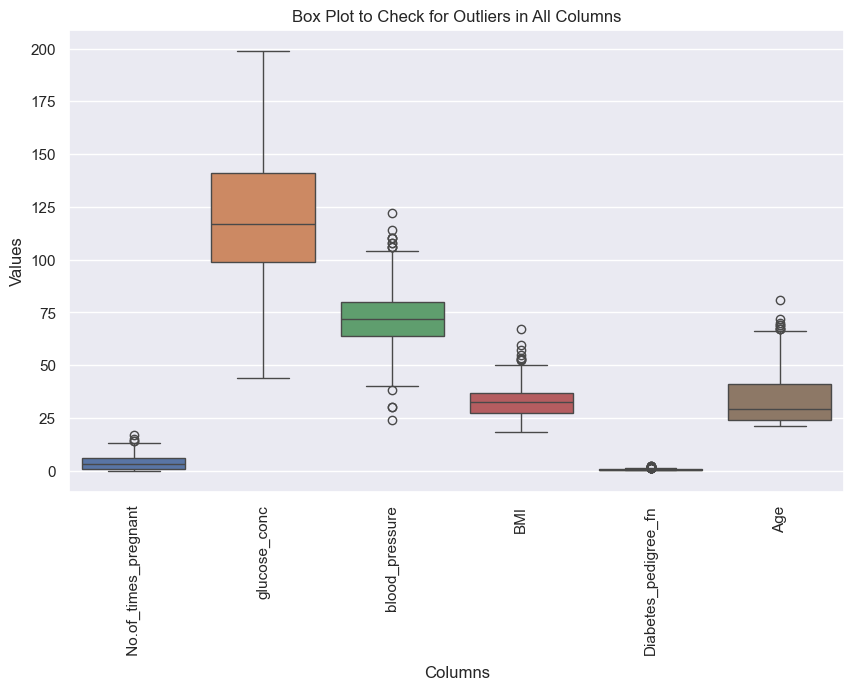

In [536]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=a)
plt.title('Box Plot to Check for Outliers in All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

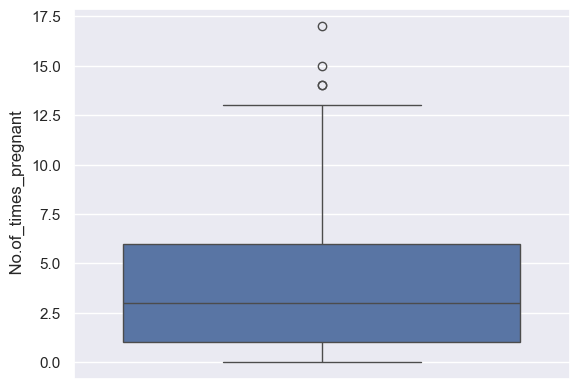

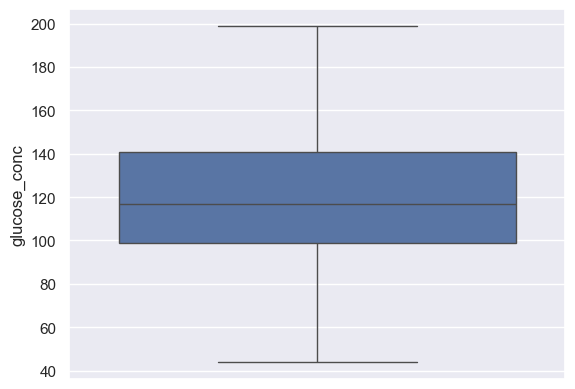

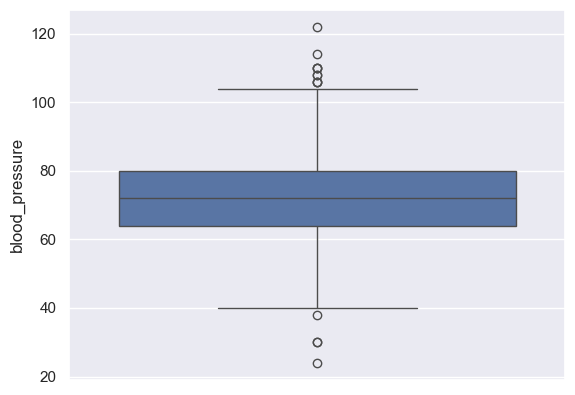

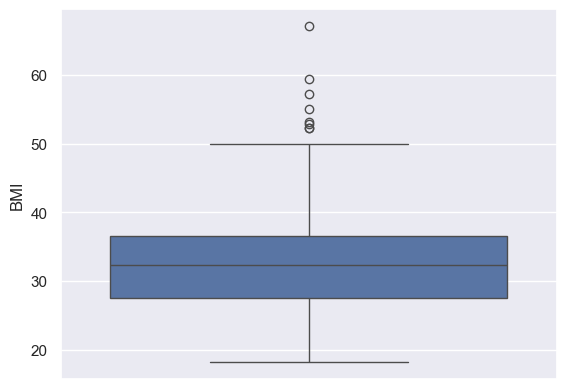

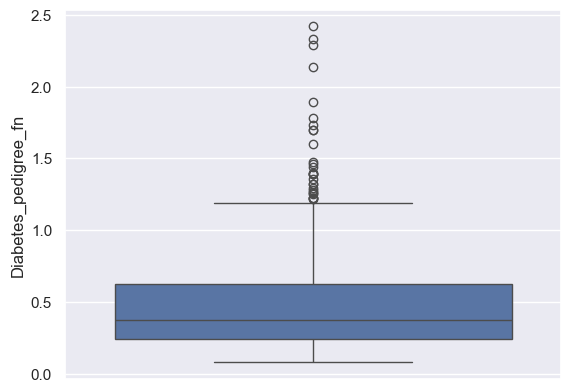

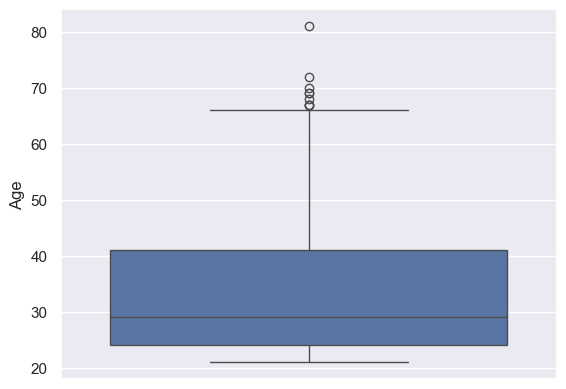

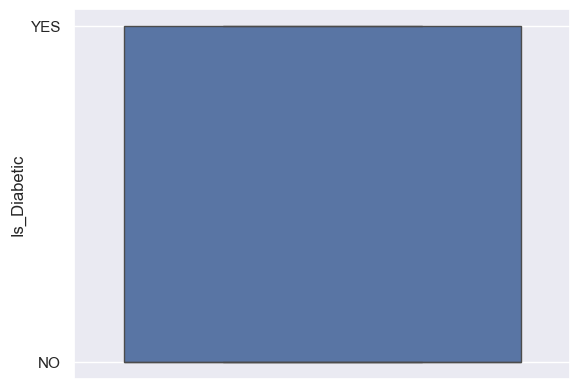

In [537]:
def boxplots(col):
    sns.boxplot(a[col])
    plt.show()
for i in list(a.columns)[0:]:
    boxplots(i)

In [538]:
# Missing Value Imputation:
a['glucose_conc'] = a['glucose_conc'].fillna(a['glucose_conc'].mean()) # no outliers

In [539]:
a['blood_pressure'] = a['blood_pressure'].fillna(a['blood_pressure'].mean()) # null valueswith outliers

In [540]:
a['BMI'] = a['BMI'].fillna(a['BMI'].mean()) # null values with outliers

In [541]:
a.isna().sum()

 No.of_times_pregnant    0
glucose_conc             0
blood_pressure           0
BMI                      0
Diabetes_pedigree_fn     0
Age                      0
Is_Diabetic              0
dtype: int64

# IQR Method-Outlier Treatment

In [543]:
NOTP_Q1 = a[' No.of_times_pregnant'].quantile(0.25)
NOTP_Q3 = a[' No.of_times_pregnant'].quantile(0.75)
NOTP_IQR = NOTP_Q3 - NOTP_Q1
NOTP_upper = NOTP_Q3 + 1.5 * NOTP_IQR
NOTP_lower = NOTP_Q1 - 1.5 * NOTP_IQR
print(f"NOTP_upper_bound: {NOTP_upper}, NOTP_lower_bound: {NOTP_lower}")

NOTP_upper_bound: 13.5, NOTP_lower_bound: -6.5


In [544]:
a[' No.of_times_pregnant'] = a[' No.of_times_pregnant'].clip(lower=NOTP_lower, upper=NOTP_upper) #clip method

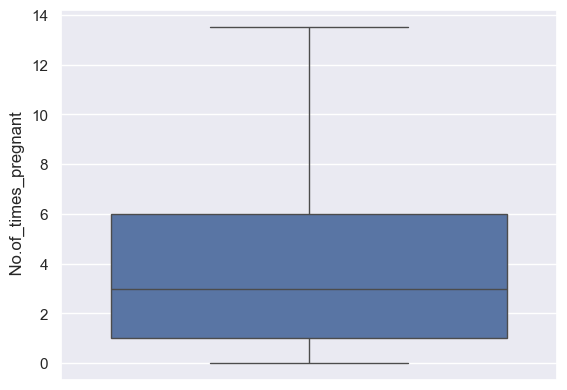

In [545]:
sns.boxplot(y = ' No.of_times_pregnant', data=a)
plt.show()

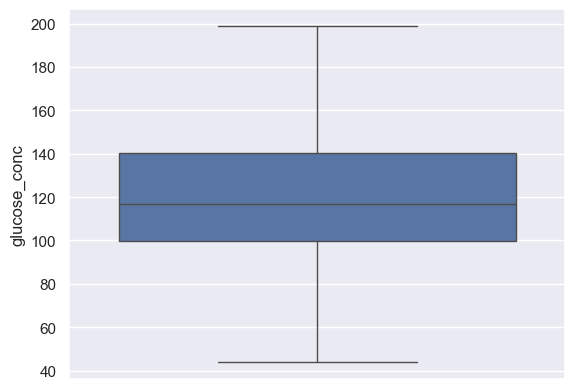

In [546]:
sns.boxplot(y = 'glucose_conc', data=a)
plt.show()

In [547]:
blood_pressure_Q1 = a['blood_pressure'].quantile(0.25)
blood_pressure_Q3 = a['blood_pressure'].quantile(0.75)
blood_pressure_IQR = blood_pressure_Q3 - blood_pressure_Q1
blood_pressure_upper = blood_pressure_Q3 + 1.5 * blood_pressure_IQR
blood_pressure_lower = blood_pressure_Q1 - 1.5 * blood_pressure_IQR
print(f"blood_pressure_upper_bound: {blood_pressure_upper}, blood_pressure_lower_bound: {blood_pressure_lower}")

blood_pressure_upper_bound: 104.0, blood_pressure_lower_bound: 40.0


In [548]:
a['blood_pressure'] = a['blood_pressure'].clip(lower=blood_pressure_lower, upper=blood_pressure_upper) #clip method

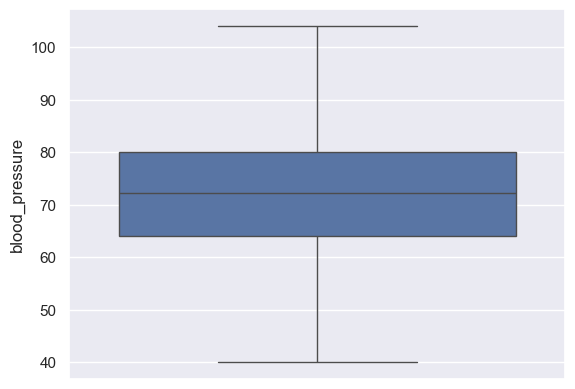

In [549]:
sns.boxplot(y = 'blood_pressure', data=a)
plt.show()

In [550]:
BMI_Q1 = a['BMI'].quantile(0.25)
BMI_Q3 = a['BMI'].quantile(0.75)
BMI_IQR = BMI_Q3 - BMI_Q1
BMI_upper = BMI_Q3 + 1.5 * BMI_IQR
BMI_lower = BMI_Q1 - 1.5 * BMI_IQR
print(f"BMI_upper_bound: {BMI_upper}, BMI_lower_bound: {BMI_lower}")

BMI_upper_bound: 50.25, BMI_lower_bound: 13.849999999999998


In [551]:
a['BMI'] = a['BMI'].clip(lower=BMI_lower, upper=BMI_upper) 

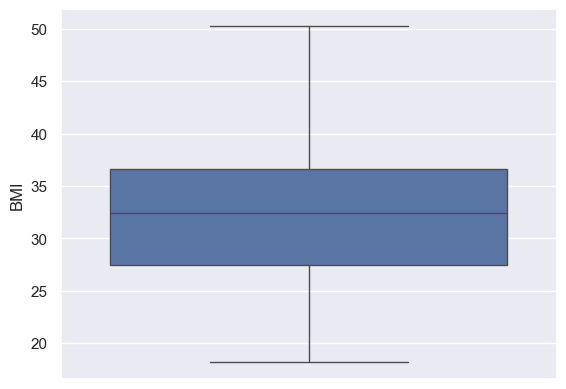

In [552]:
sns.boxplot(y = 'BMI', data=a)
plt.show()

In [553]:
Diabetes_pedigree_fn_Q1 = a['Diabetes_pedigree_fn'].quantile(0.25)
Diabetes_pedigree_fn_Q3 = a['Diabetes_pedigree_fn'].quantile(0.75)
Diabetes_pedigree_fn_IQR = Diabetes_pedigree_fn_Q3 - Diabetes_pedigree_fn_Q1
Diabetes_pedigree_fn_upper = Diabetes_pedigree_fn_Q3 + 1.5 * Diabetes_pedigree_fn_IQR
Diabetes_pedigree_fn_lower = Diabetes_pedigree_fn_Q1 - 1.5 * Diabetes_pedigree_fn_IQR
print(f"Diabetes_pedigree_fn_upper_bound: {Diabetes_pedigree_fn_upper}, Diabetes_pedigree_fn_lower_bound: {Diabetes_pedigree_fn_lower}")

Diabetes_pedigree_fn_upper_bound: 1.2, Diabetes_pedigree_fn_lower_bound: -0.32999999999999996


In [554]:
a['Diabetes_pedigree_fn'] = a['Diabetes_pedigree_fn'].clip(lower=Diabetes_pedigree_fn_lower, upper=Diabetes_pedigree_fn_upper) 

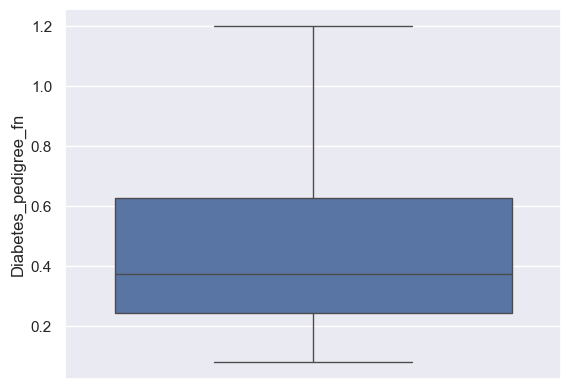

In [555]:
sns.boxplot(y = 'Diabetes_pedigree_fn', data=a)
plt.show()

In [556]:
Age_Q1 = a['Age'].quantile(0.25)
Age_Q3 = a['Age'].quantile(0.75)
Age_IQR = Age_Q3 - Age_Q1
Age_upper = Age_Q3 + 1.5 * Age_IQR
Age_lower = Age_Q1 - 1.5 * Age_IQR
print(f"Age_upper_bound: {Age_upper}, Age_lower_bound: {Age_lower}")

Age_upper_bound: 66.5, Age_lower_bound: -1.5


In [557]:
a['Age'] = a['Age'].clip(lower=Age_lower, upper=Age_upper) 

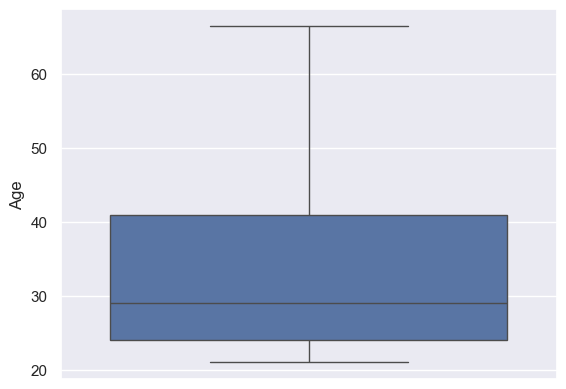

In [558]:
sns.boxplot(y = 'Age', data=a)
plt.show()

# Encoding

In [560]:
a['Is_Diabetic'] = a['Is_Diabetic'].astype('category')
a['Is_Diabetic'] = a['Is_Diabetic'].cat.codes # Label Encoding

In [561]:
a

,No.of_times_pregnant,glucose_conc,blood_pressure,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
0,6.0,148.0,72.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,30.1,0.349,47.0,1


In [562]:
a.Is_Diabetic.dtypes

dtype('int8')

In [563]:
# Correlation

In [564]:
a.corr()

,No.of_times_pregnant,glucose_conc,blood_pressure,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
No.of_times_pregnant,1.000000,0.126554,0.210813,0.027166,-0.017398,0.549695,0.220392
glucose_conc,0.126554,1.000000,0.219611,0.233488,0.118189,0.268535,0.492928
blood_pressure,0.210813,0.219611,1.000000,0.286554,0.011915,0.332547,0.169333
BMI,0.027166,0.233488,0.286554,1.000000,0.138290,0.035610,0.312693
Diabetes_pedigree_fn,-0.017398,0.118189,0.011915,0.138290,1.000000,0.047289,0.184969
Age,0.549695,0.268535,0.332547,0.035610,0.047289,1.000000,0.242702
Is_Diabetic,0.220392,0.492928,0.169333,0.312693,0.184969,0.242702,1.000000


# Top 3 Influential Features:

* Glucose Concentration (0.49) — Strongest predictor of diabetes.
* BMI (0.31) — Obesity significantly contributes to diabetes.
* Age (0.24) — Older age increases the risk of diabetes.
# Less Influential Features:
* Pregnancy Count (0.22) — Mild impact.
* Blood Pressure (0.16) — Slight impact.
* Diabetes Pedigree Function (0.18) — Weak but still valuable.

# Why check EDA first?
Sometimes highly correlated features may still hold unique patterns.
Dropping without checking may affect model accuracy.
Outliers and imbalanced data may mislead correlation results.

# Univariate Analysis

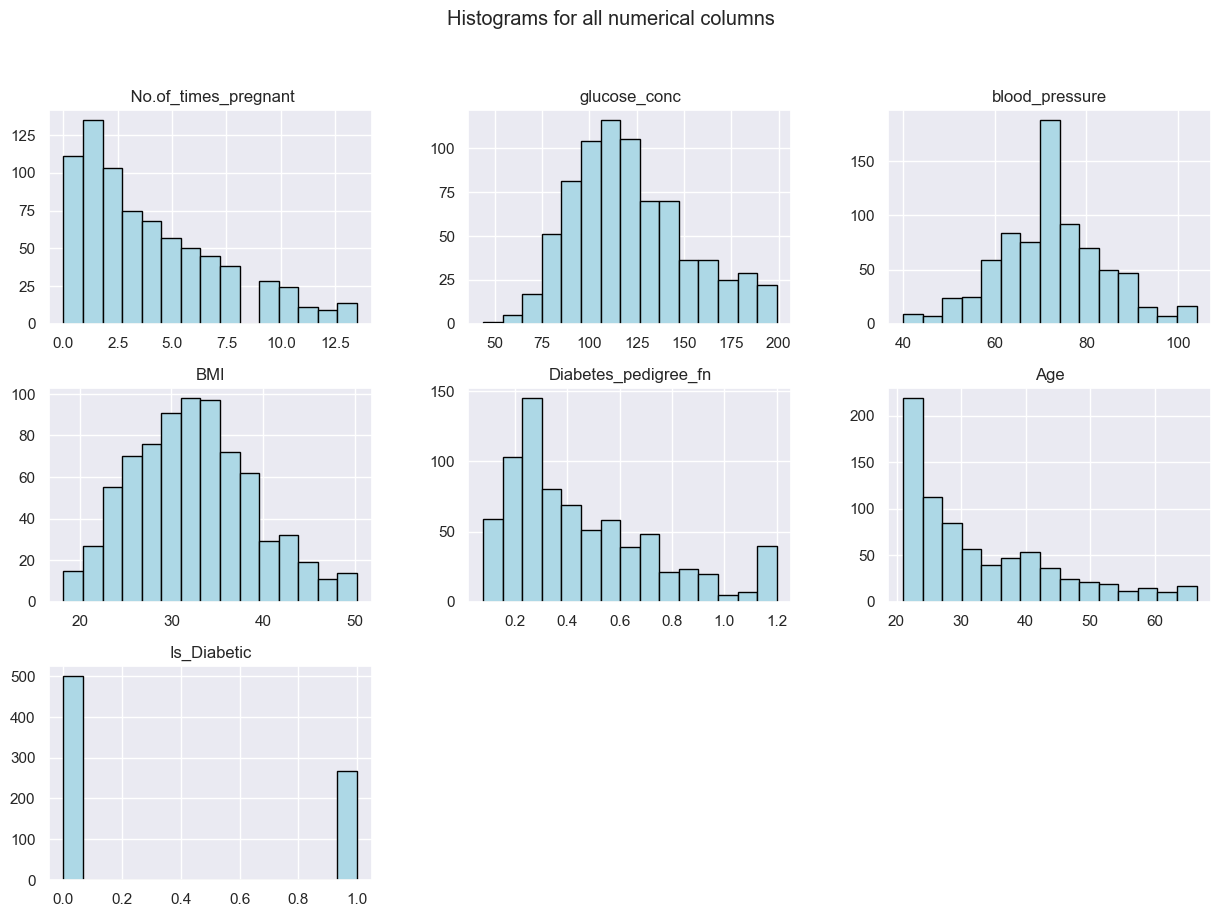

In [568]:
a.hist(bins=15, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Histograms for all numerical columns')
plt.show()

# Bivariate Analysis:

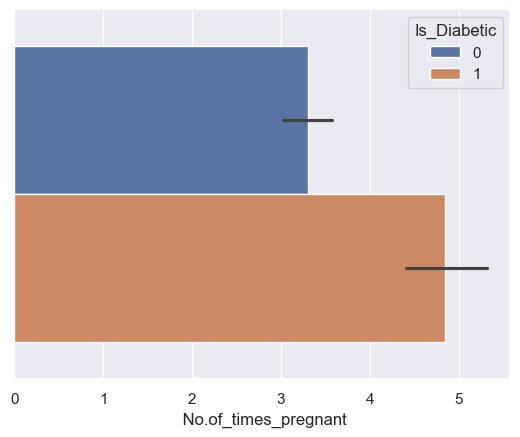

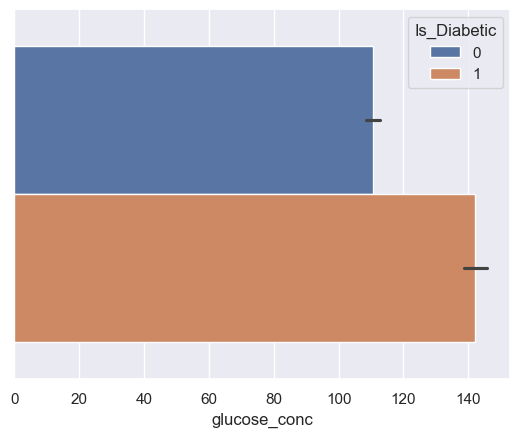

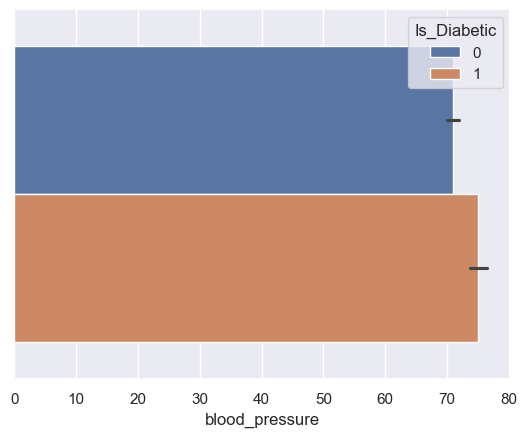

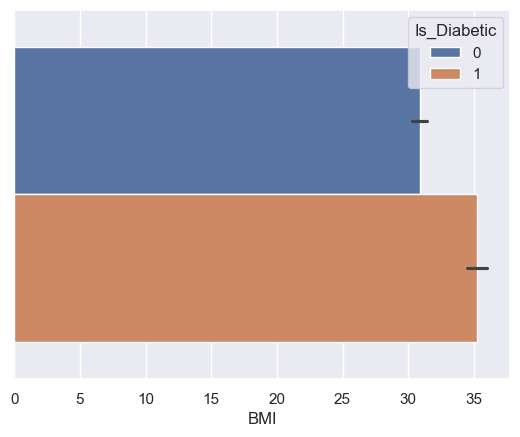

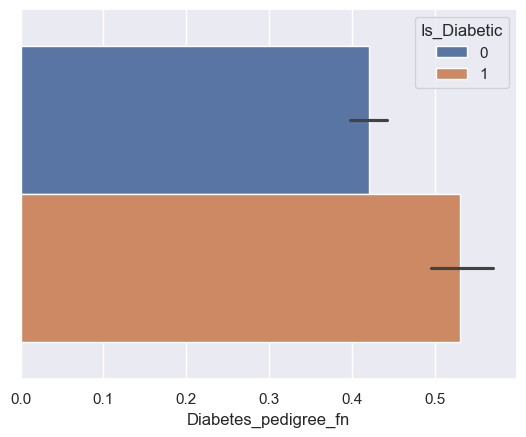

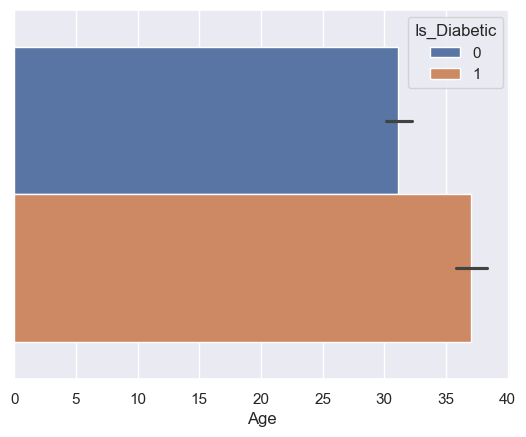

In [570]:
for i, predictor in enumerate(a.drop(columns=['Is_Diabetic'])):
    plt.figure()
    sns.barplot(data=a,x=predictor,hue='Is_Diabetic')

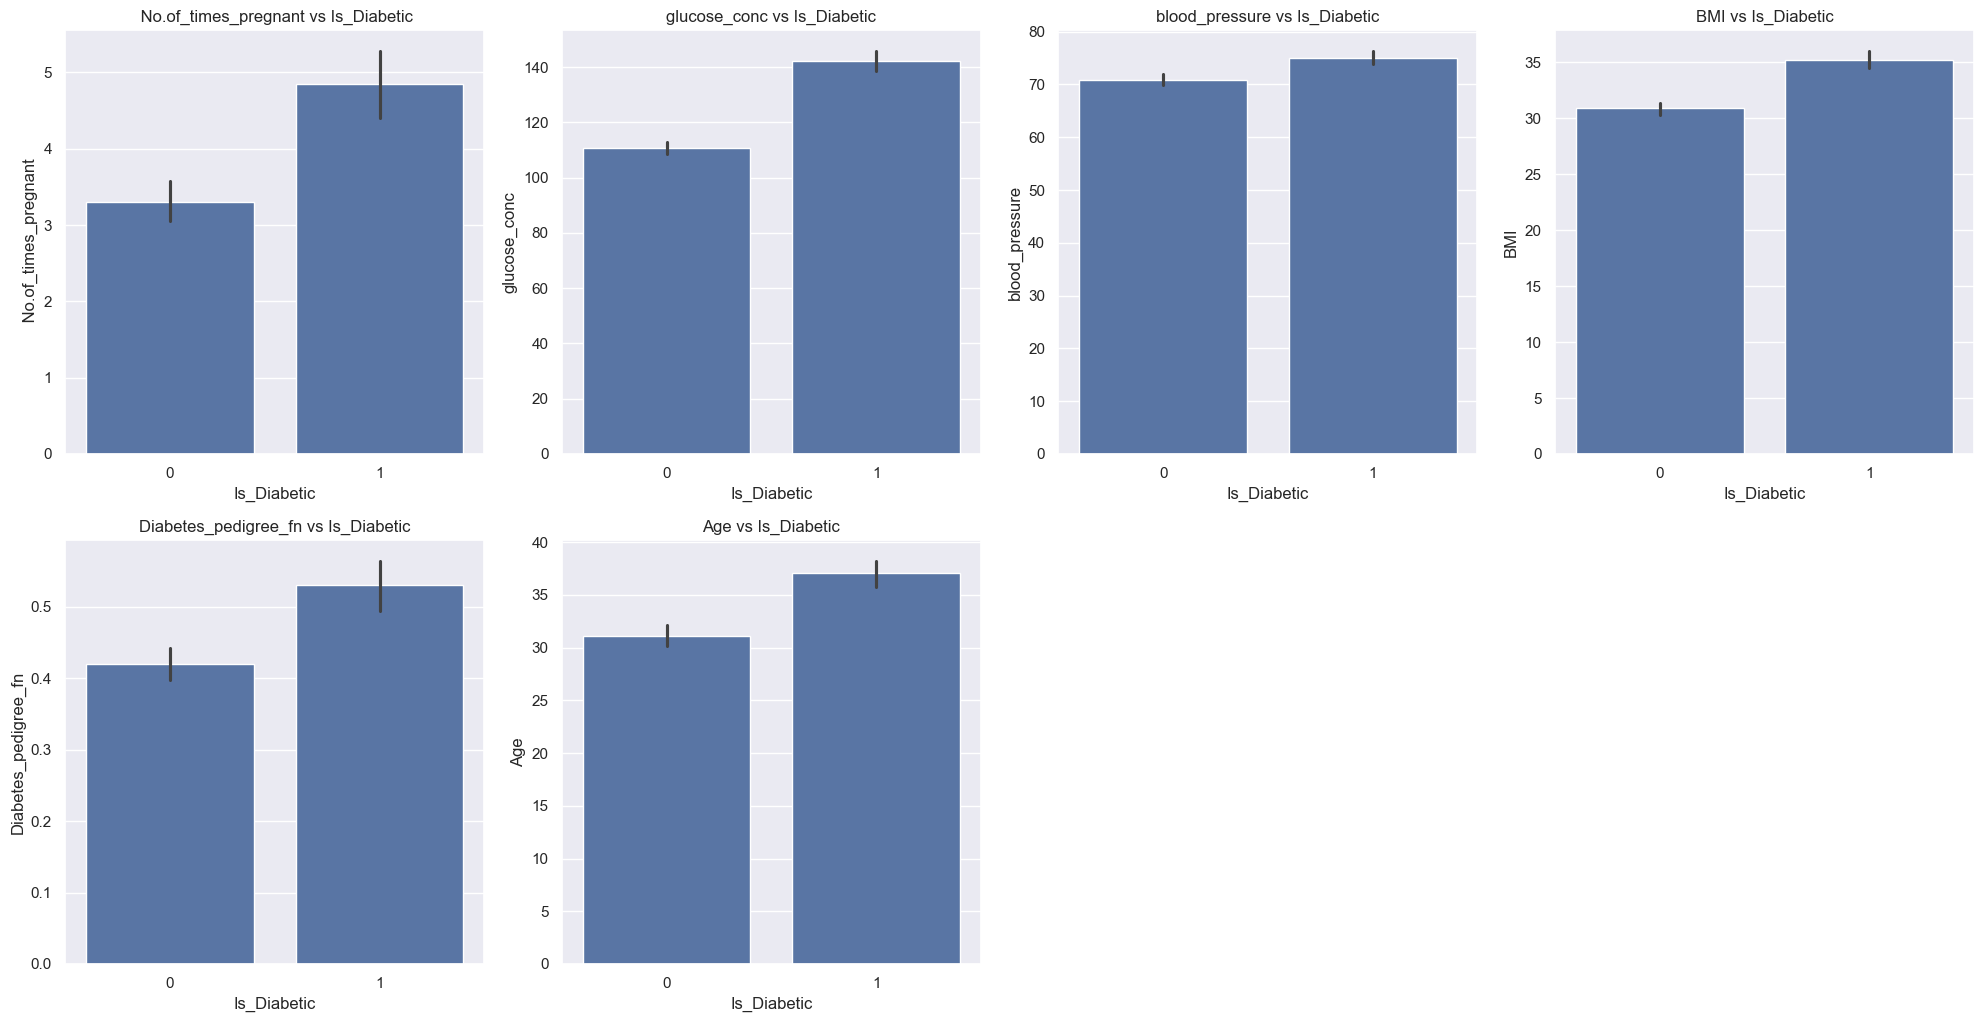

In [571]:
# List of predictors (excluding target 'Is_Diabetic')
predictors = a.drop(columns=['Is_Diabetic']).columns

# Set up the grid size based on the number of predictors
rows = 3
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    sns.barplot(data=a, x='Is_Diabetic', y=predictor, ax=axes[i])
    axes[i].set_title(f"{predictor} vs Is_Diabetic")
    axes[i].set_xlabel("Is_Diabetic")
    axes[i].set_ylabel(predictor)

# Remove any empty subplots (if total plots < rows*cols)
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# HEATMAP

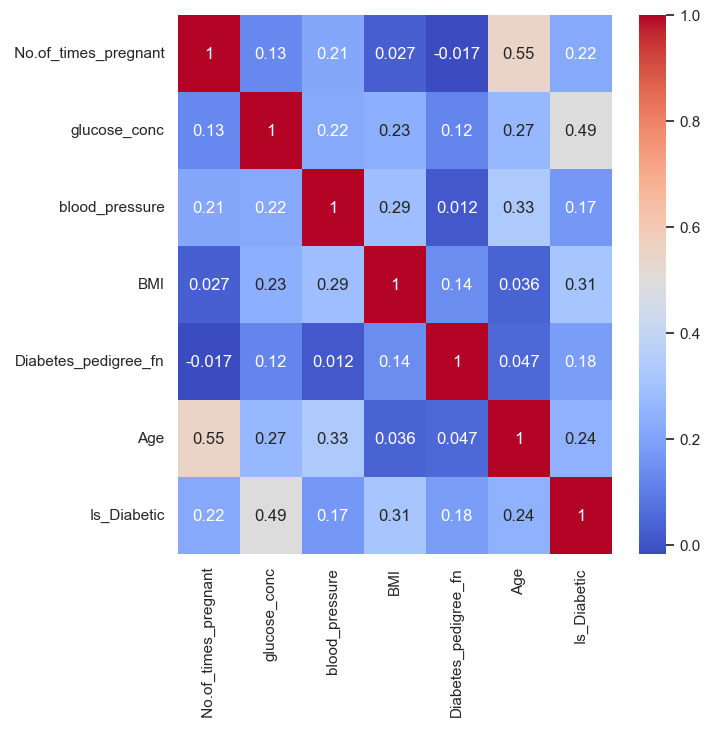

In [573]:
plt.figure(figsize=(7,7))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm')
plt.show()

# Insights:
* Higher glucose concentration is strongly associated with a higher chance of diabetes. This feature is highly important for prediction.
* Higher BMI indicates higher body fat, which increases the risk of diabetes. This feature significantly impacts diabetes prediction.
* Older individuals have a higher chance of developing diabetes. Age is an important factor but not as strong as Glucose or BMI.
* Women with a higher number of pregnancies have a slightly higher risk of diabetes. This feature may still contribute to prediction but not as strongly as glucose or BMI.
* Individuals with a family history of diabetes have a higher chance of being diabetic, although the correlation is relatively low.
* Higher blood pressure has a minor impact on diabetes prediction. However, it may still contribute in combination with other features.
* Older women tend to have had more pregnancies, which may indirectly influence diabetes risk.

# Feature Selection

In [576]:
# we can only do with independent variable
# split the data into independent variable and dependent variable
x = a.iloc[:,0:-1]
y = a['Is_Diabetic']

In [577]:
x.head(2)

,No.of_times_pregnant,glucose_conc,blood_pressure,BMI,Diabetes_pedigree_fn,Age
0,6.0,148.0,72.0,33.6,0.627,50.0
1,1.0,85.0,66.0,26.6,0.351,31.0


In [578]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Is_Diabetic, dtype: int8

# Feature Scaling - Standardization

In [580]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5
0,0.647150,0.865108,-0.032212,0.180754,0.588927,1.445691
1,-0.848970,-1.206162,-0.545506,-0.869804,-0.378101,-0.189304
2,1.245598,2.015813,-0.716604,-1.365068,0.746595,-0.103252
3,-0.848970,-1.074652,-0.545506,-0.644685,-1.022787,-1.049828
4,-1.148194,0.503458,-2.769778,1.606512,2.596563,-0.017199
...,...,...,...,...,...,...
763,1.844045,-0.680125,0.309983,0.075698,-1.008772,2.564372
764,-0.549746,0.010298,-0.203310,0.661009,-0.416642,-0.533513
765,0.347926,-0.022579,-0.032212,-0.929836,-0.749497,-0.275356
766,-0.848970,0.141808,-1.058799,-0.344525,-0.385109,1.187534


# IMBALANCE CHECKING

In [587]:
# Check Imbalance Data
b['Is_Diabetic'].value_counts()

Is_Diabetic
0    500
1    268
Name: count, dtype: int64

In [588]:
total = b['Is_Diabetic'].count()
percent_1 = (500 / total) * 100
percent_2 = (268 / total) * 100
print(f"Class 1: {percent_1:.2f}%")
print(f"Class 2: {percent_2:.2f}%")

Class 1: 65.10%
Class 2: 34.90%


In [589]:
import imblearn

In [590]:
from imblearn.over_sampling import RandomOverSampler # SMOTE
ros = RandomOverSampler() # SMOTE()
x_sam, y_sam = ros.fit_resample(sc_x, y)
print(x_sam.shape, y_sam.shape, y.shape)

(1000, 6) (1000,) (768,)


In [591]:
y_sam.value_counts()

Is_Diabetic
1    500
0    500
Name: count, dtype: int64

# Model Selection & Training
* Split data (Train-Test Split, 80-20 or 70-30)
* Choose the model based on the problem
* Train the model on the training dataset

# split the data into training and test

In [594]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25, random_state=101,
                                                  stratify=y_sam )

# Building KNN model

In [596]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the best K-Value (HyperParameter Tunning)

In [598]:
error_rate  = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [599]:
error_rate

[0.204,
 0.256,
 0.216,
 0.244,
 0.244,
 0.232,
 0.228,
 0.212,
 0.216,
 0.228,
 0.248,
 0.232,
 0.244,
 0.24,
 0.22,
 0.228,
 0.224,
 0.224,
 0.224,
 0.224,
 0.232,
 0.228,
 0.236,
 0.24,
 0.24,
 0.24,
 0.232,
 0.236,
 0.24,
 0.24,
 0.236,
 0.224,
 0.236,
 0.232,
 0.244,
 0.224,
 0.22,
 0.24,
 0.236]

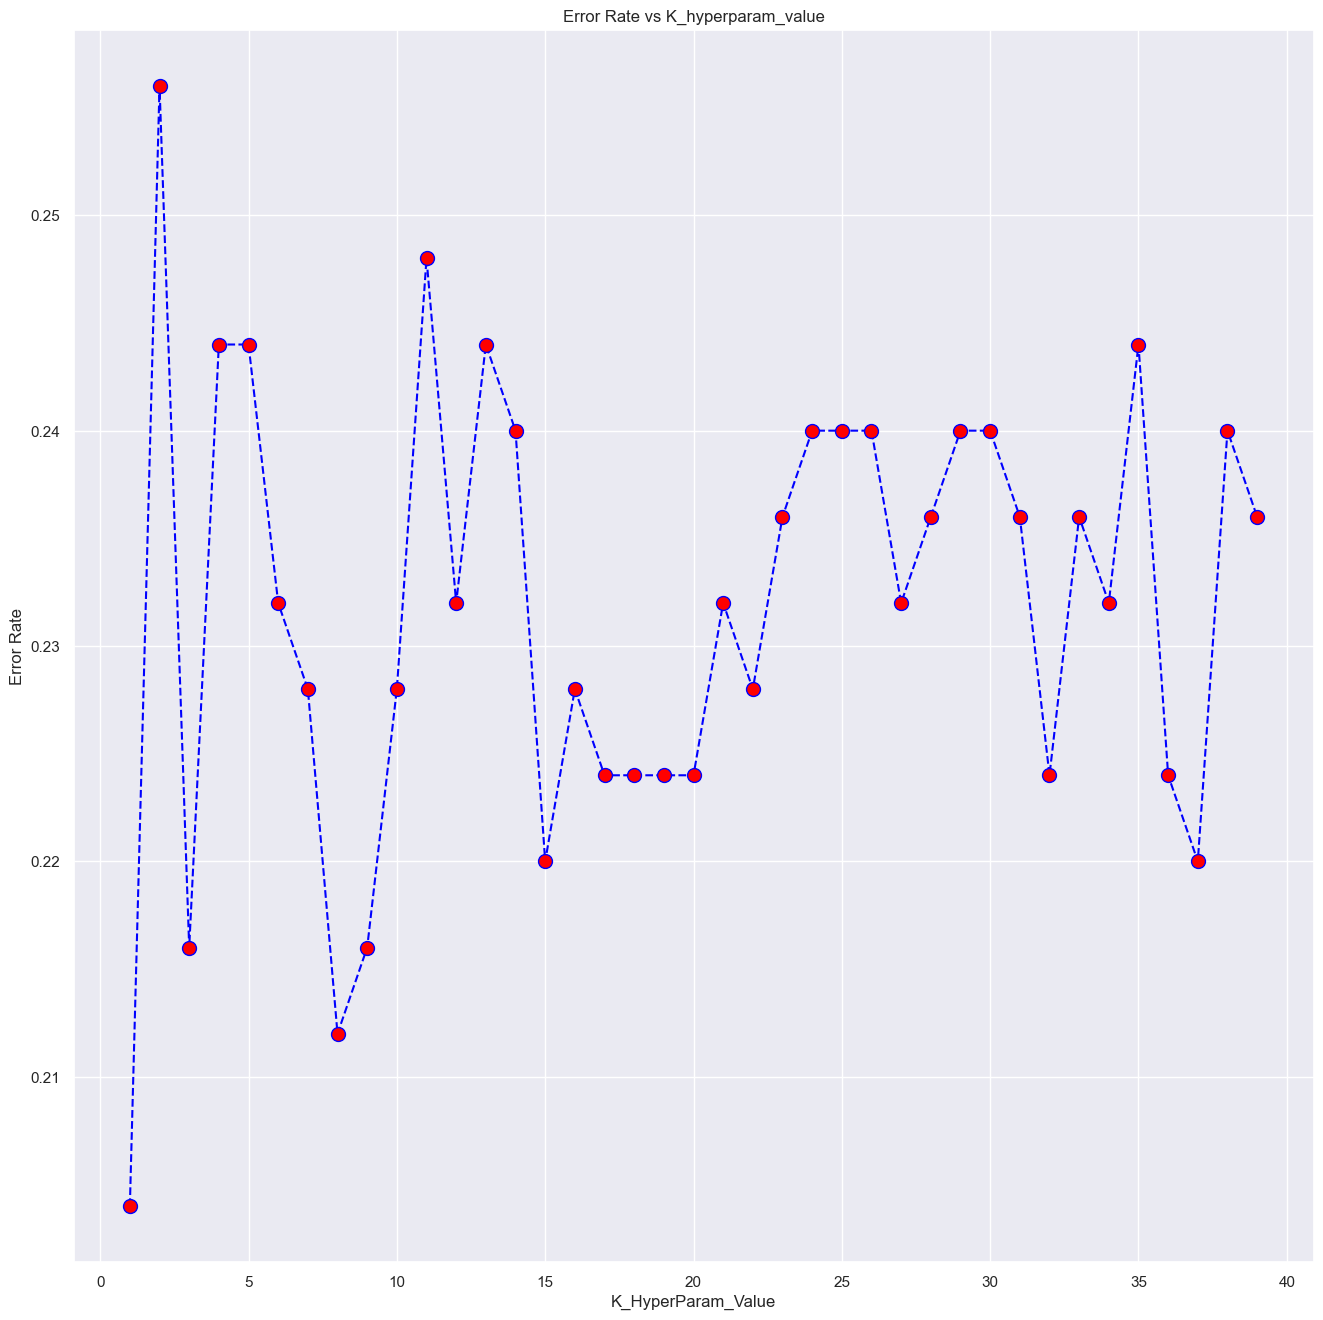

In [600]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K_hyperparam_value")
plt.xlabel("K_HyperParam_Value")
plt.ylabel("Error Rate")
plt.show()

In [601]:
# Basis analysis, error_rate would be less when we choose k=27

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [602]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [603]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [604]:
print(confusion_matrix(y_train, y_pred_train))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[375   0]
 [ 59 316]]
********************************************************************************
[[103  22]
 [ 42  83]]


In [605]:
print(classification_report(y_train, y_pred_train))
print("****************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       375
           1       1.00      0.84      0.91       375

    accuracy                           0.92       750
   macro avg       0.93      0.92      0.92       750
weighted avg       0.93      0.92      0.92       750

********************************************************************************
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       125
           1       0.79      0.66      0.72       125

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



In [606]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.9213333333333333
********************************************************************************
Test Accuracy : 0.744


# Cross Validation¶

In [608]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, x_test, y_test, cv=10)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.7346666666666668
*******************************************************************************************************************
Test Accuracy after CV : 0.704
